In [1]:
from controller import Imager

In [2]:
imager = Imager()

Found 1 devices
Devices IDs - ['101936']


In [3]:
imager.cams[-1].remote_device.node_map.ExposureAuto.value = 'Off'
imager.update_params(ExposureTime=2000, AcquisitionFrameRate = 50)

In [4]:
PIXELFORMATS = {'8':'Mono8','12':'Mono12Packed'}
PIXELFORMAT = PIXELFORMATS['12']
imager.update_params(ExposureTime=20000, PixelFormat=PIXELFORMAT, AcquisitionFrameRate = 50)

In [5]:
imager._start_acquisitions()

0 - 2021-10-13 08:16:09.397263 - 101936 captured Mono12Packed image 
0 - 2021-10-13 08:16:15.906202 - 101936 captured Mono12Packed image 
0 - 2021-10-13 08:16:22.229667 - 101936 captured Mono12Packed image 
0 - 2021-10-13 08:16:28.478214 - 101936 captured Mono12Packed image 
0 - 2021-10-13 08:16:34.758460 - 101936 captured Mono12Packed image 
0 - 2021-10-13 08:16:41.100074 - 101936 captured Mono12Packed image 
0 - 2021-10-13 08:16:47.324239 - 101936 captured Mono12Packed image 
0 - 2021-10-13 08:16:53.608392 - 101936 captured Mono12Packed image 
0 - 2021-10-13 08:16:59.852987 - 101936 captured Mono12Packed image 
0 - 2021-10-13 08:17:06.121646 - 101936 captured Mono12Packed image 
0 - 2021-10-13 08:17:12.398617 - 101936 captured Mono12Packed image 
0 - 2021-10-13 08:17:18.662098 - 101936 captured Mono12Packed image 
0 - 2021-10-13 08:17:24.916624 - 101936 captured Mono12Packed image 
0 - 2021-10-13 08:17:31.232928 - 101936 captured Mono12Packed image 
0 - 2021-10-13 08:17:37.518209 - 1

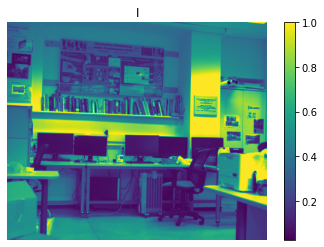

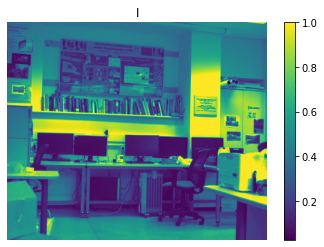

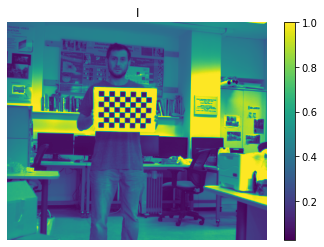

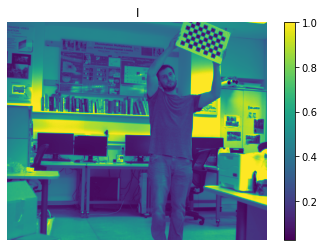

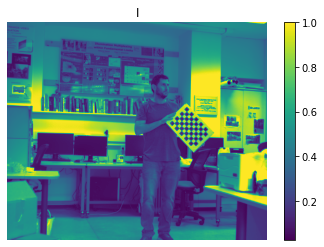

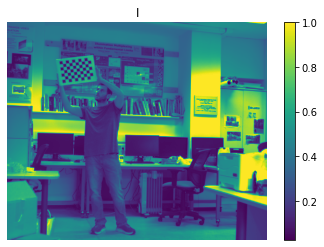

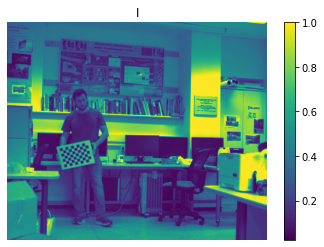

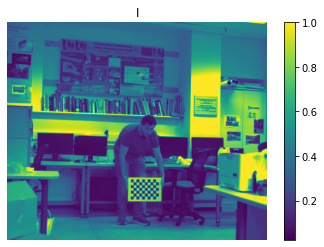

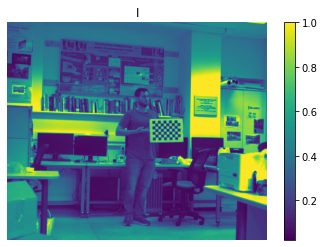

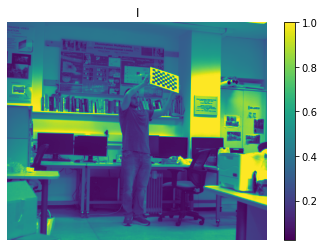

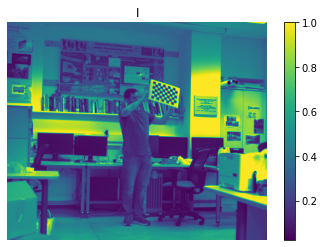

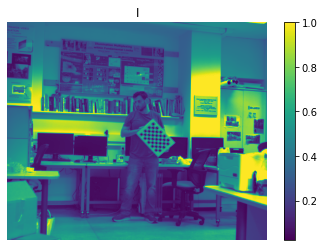

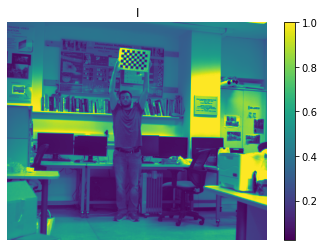

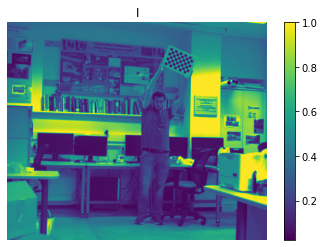

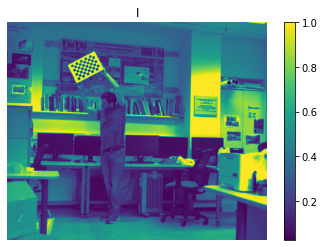

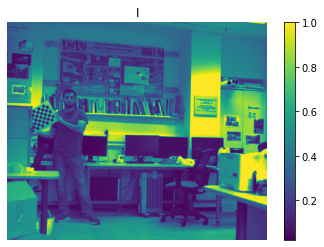

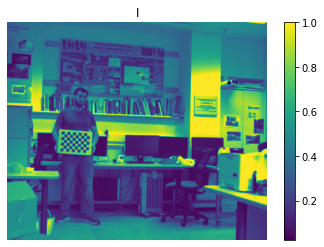

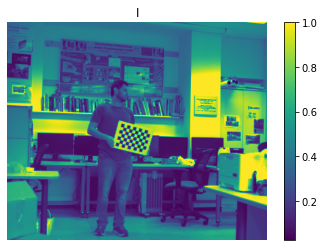

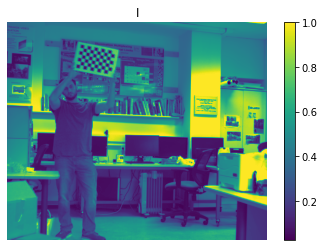

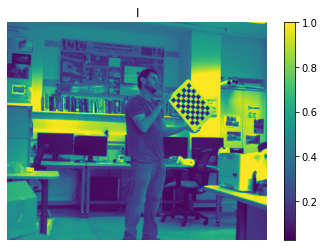

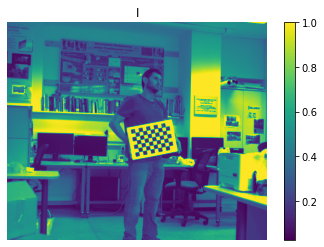

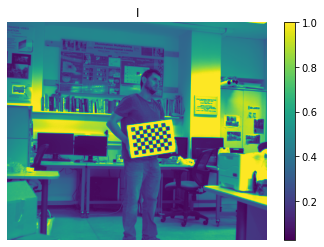

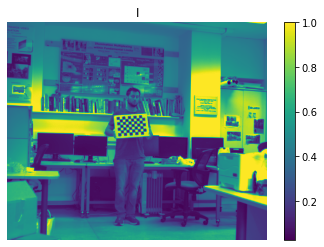

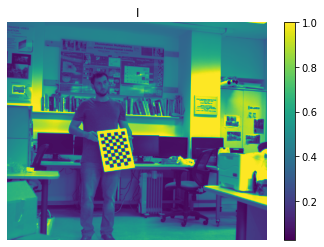

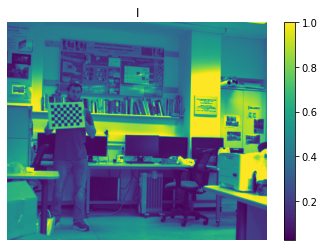

In [6]:
import time
import cv2
import polanalyser as pa
from PIL import Image
import matplotlib.pyplot as plt
from mpldatacursor import datacursor
import numpy as np
# Based on https://github.com/elerac/polanalyser
time.sleep(10)
n= 25
for i in range(n):
    init_image = imager.capture_sequence(num_frames=1, sleep_seconds1=5,sleep_seconds2=5)
    init_image = np.squeeze(np.array(init_image[0]))
    np.save(str(i),init_image)

    img_demosaiced = pa.demosaicing(init_image)
    img_0, img_45, img_90, img_135 = cv2.split(img_demosaiced)
    #Image.fromarray(img_0).show()
    #Image.fromarray(img_45).show()
    #Image.fromarray(img_90).show()
    #Image.fromarray(img_135).show()
    Stokes =  pa.calcLinearStokes(np.moveaxis(np.array([img_0, img_45, img_90, img_135]), 0, -1),
                                  np.deg2rad([0,45,90,135]))
    I = Stokes[:, :, 0]
    DoLP = pa.cvtStokesToDoLP(Stokes)
    AoLP = (180/np.pi)*pa.cvtStokesToAoLP(Stokes)-90
    plt.figure(1)
    im1 = plt.imshow(I/np.max(I))
    plt.colorbar(im1)
    datacursor()
    plt.title('I')
    plt.axis('off')
    plt.show()
    '''
    plt.figure(2)
    im2 = plt.imshow(DoLP)
    plt.colorbar(im2)
    datacursor(im2)
    plt.title('DoLP')
    plt.axis('off')
    plt.show()
    plt.figure(3)
    im3 = plt.imshow(AoLP)
    plt.colorbar(im3)
    datacursor(im3)
    plt.title('AoLP')
    plt.axis('off')
    '''

    #plt.show()




In [8]:
#imager.get_images(show_images=True, save_images=False)
raw_images = imager.capture_sequence(num_frames=50, sleep_seconds1=0.2, sleep_seconds2=0.2)

0 - 2021-10-12 18:41:52.914107 - 101936 captured Mono12Packed image 


([array([[21, 13, 19, ..., 82, 77, 83],
         [17, 10, 16, ..., 82, 78, 83],
         [19, 14, 20, ..., 84, 78, 85],
         ...,
         [11, 11, 11, ..., 10, 10, 10],
         [11, 12, 11, ..., 10,  9, 11],
         [11, 11, 13, ..., 11, 10, 11]], dtype=uint16)],
 [(0, datetime.datetime(2021, 10, 12, 18, 41, 52, 914107), '101936')])

In [20]:
imager._stop_acquisitions()

In [8]:
imager.clear_all()

In [22]:
imager.cams[-1].remote_device.node_map.ExposureAuto.value = 'Off'

'Off'

In [10]:
import numpy as np
np.array(raw_images[0]).shape

(5, 2048, 2448)

In [11]:
num_frames =10

arr = np.empty((num_frames,5,2048,2448), dtype='uint8')
for frame_num in range(num_frames):
    arr[frame_num] = np.array(raw_images[frame_num])

In [25]:
import pickle
pickle.dump(raw_images, open("dump3.pkl", 'wb'))

In [14]:
np.save('arr', arr)

In [14]:
arr = np.load('0.npy')
